## House Price Prediction for Ames, USA

### About Dataset
This dataset describes the sale of individual residential property in Ames, Iowa
from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory
variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home
values.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset

In [2]:
df = pd.read_csv('C:\\Users\\hp\\Desktop\\Regression_Project\\Ames_Housing_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2929.0,4.426296e+02,4.555908e+02,0.0,0.000000e+00,370.0,7.340000e+02,5.644000e+03


In [5]:
# Reading the test file containing information about features

with open('C:\\Users\\hp\\Desktop\\Regression_Project\\Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

### Observing Correlation

<Axes: >

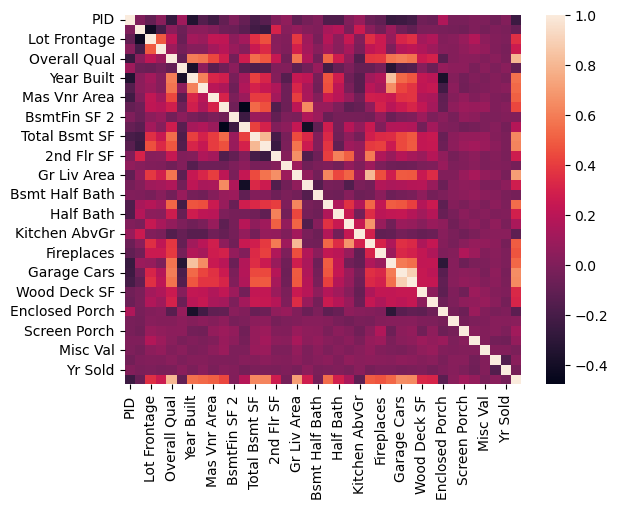

In [6]:
# Finding the features which are highly correlated with output target
sns.heatmap(df.corr(numeric_only = True))

In [7]:
df.corr(numeric_only = True)['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

#### Distribution of SalePrice

<Axes: xlabel='SalePrice', ylabel='Count'>

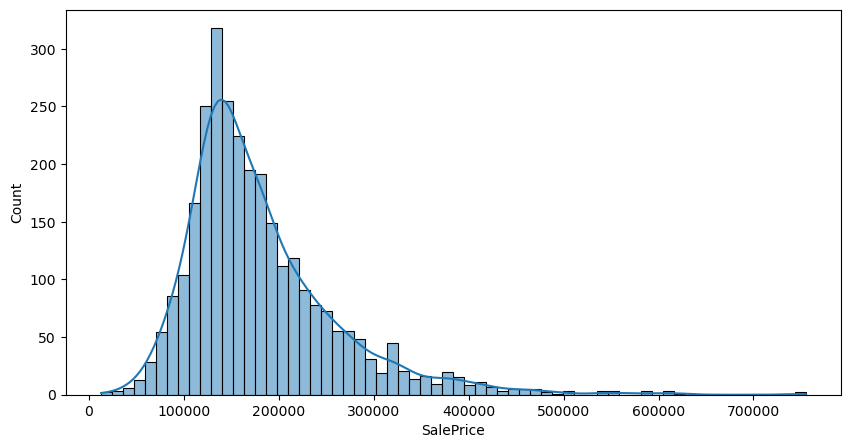

In [8]:
plt.figure(figsize = (10,5))
sns.histplot(df['SalePrice'], kde = True)

### Dealing with outliers

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

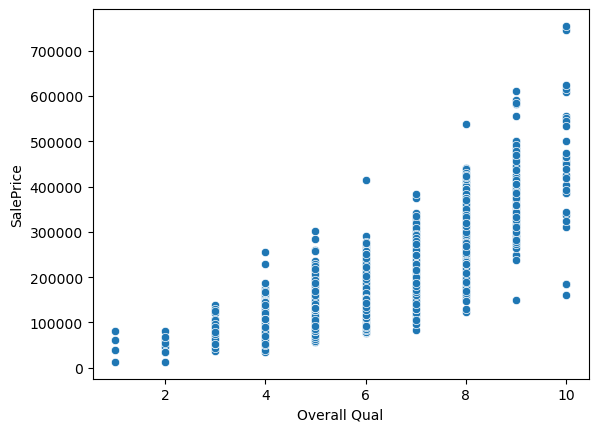

In [9]:
# ScatterPlot between 'SalePrice' and highly correleted feature 'Overall Qual'
sns.scatterplot(data = df, x = 'Overall Qual', y = 'SalePrice')

In [10]:
# Outliers from Overall Qual Feature
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

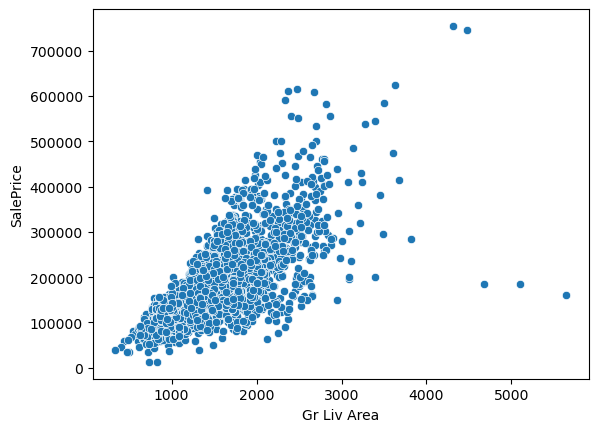

In [11]:
# ScatterPlot between 'SalePrice' and highly correleted feature 'Gr Liv Area'
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [12]:
# Outliers from Gr Liv Area Feature
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [13]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [14]:
df = df.drop(ind_drop,axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

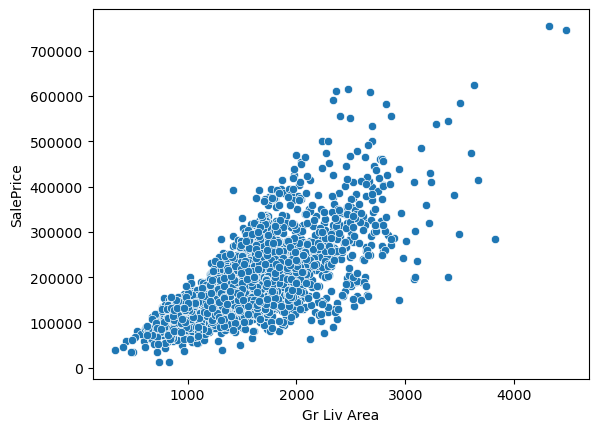

In [15]:
# Plot after removing Outliers 
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

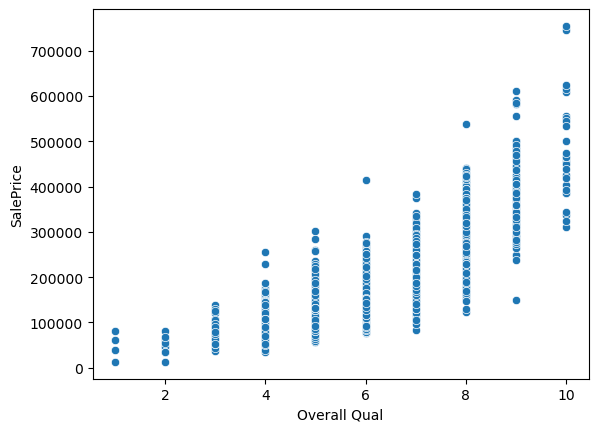

In [16]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

#### We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.

In [17]:
df = df.drop('PID', axis=1)

### Dealing with missing values

In [18]:
# Observing null values in each feature
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [19]:
# Function to find all features having null values
def percent_missing(df):
    percent_nan = df.isnull().sum()/len(df)*100
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [20]:
percent_nan = percent_missing(df)

In [21]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

#### Representation of missing values

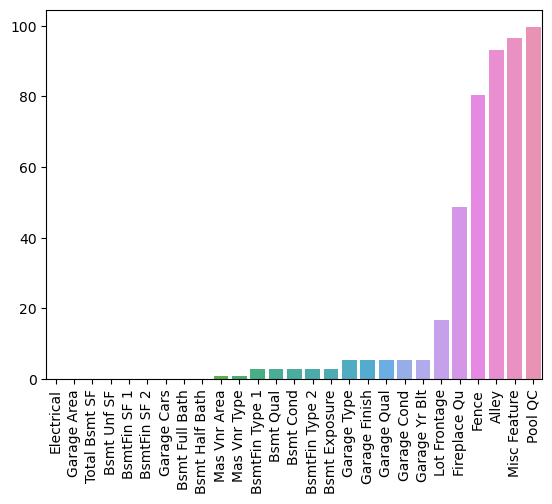

In [22]:
sns.barplot(x = percent_nan.index, y = percent_nan)
plt.xticks(rotation = 90)
plt.show()

(0.0, 1.0)

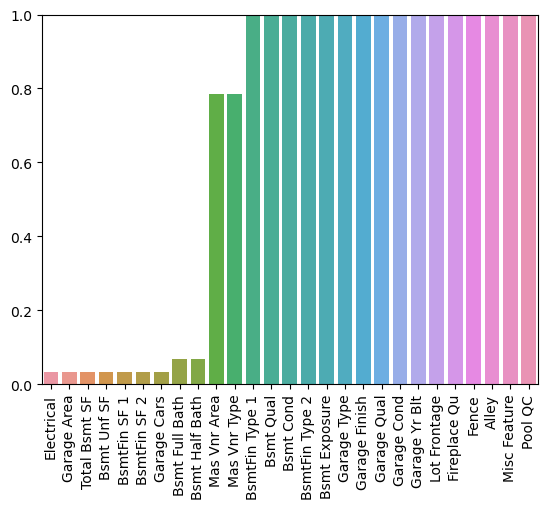

In [23]:
# Dealing with features with less than 1 percent missing values

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

In [24]:
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

#### Electric and Garage Features

In [25]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2236,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [26]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [27]:
# Removing missing rows form Electric and Garage Features
df = df.dropna(axis = 0, subset = ['Electrical','Garage Cars'])

In [28]:
percent_nan = percent_missing(df)

In [29]:
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

#### Bsmt Features

Numeric Basement Features

In [30]:
# Considering that NaN value in numeric basement columns mean there is no basement 

bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

String basement features

In [31]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

# Filling in missing values with 'None'
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

#### Mas Vnr Features

In [32]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

#### Garage Columns

In [33]:
## Checking missing columns
percent_missing(df)

Garage Type       5.367521
Garage Yr Blt     5.401709
Garage Finish     5.401709
Garage Qual       5.401709
Garage Cond       5.401709
Lot Frontage     16.752137
Fireplace Qu     48.547009
Fence            80.478632
Alley            93.230769
Misc Feature     96.410256
Pool QC          99.589744
dtype: float64

In [34]:
df[['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Qual,Garage Cond
0,Attchd,1960.0,Fin,TA,TA
1,Attchd,1961.0,Unf,TA,TA
2,Attchd,1958.0,Unf,TA,TA
3,Attchd,1968.0,Fin,TA,TA
4,Attchd,1997.0,Fin,TA,TA
...,...,...,...,...,...
2925,Detchd,1984.0,Unf,TA,TA
2926,Attchd,1983.0,Unf,TA,TA
2927,NaN,NaN,NaN,NaN,NaN
2928,Attchd,1975.0,RFn,TA,TA


In [35]:
garage_str_columns = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[garage_str_columns] = df[garage_str_columns].fillna('None')

In [36]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

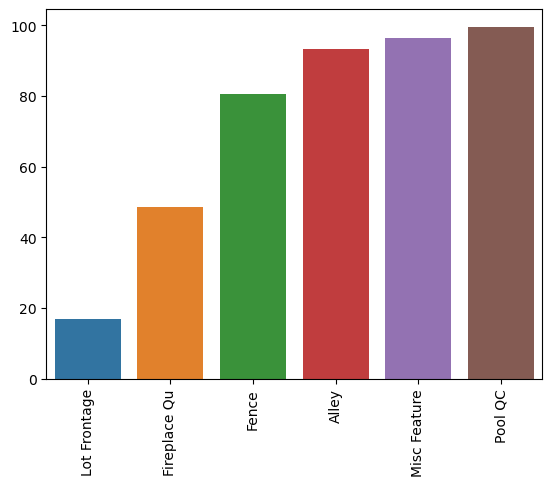

In [37]:
# Again checking missing columns
percent_nan = percent_missing(df)

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Dropping Columns with very high percentage of missing Rows

In [38]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [39]:
percent_nan = percent_missing(df)

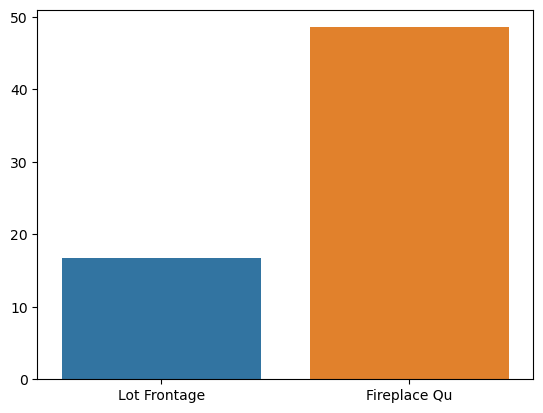

In [40]:
sns.barplot(x=percent_nan.index,y=percent_nan);

In [41]:
# Filling missing values with None as it is categorical feature
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [42]:
# Filling missing data in "Lot Frontage" feature with help of other related feature "Neighborhood"

df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [43]:
percent_missing(df)

Lot Frontage    0.102564
dtype: float64

In [44]:
# Filling the remaining values of Lot Frontage

df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [45]:
percent_missing(df)
## Every missing value has been resolved.

Series([], dtype: float64)

### Onehot Encoding

In [46]:
# Ensure every categorical column has string datatype

In [47]:
# Convert to String
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [48]:
object_df = df.select_dtypes(include = 'object')
num_df = df.select_dtypes(exclude = 'object')

In [49]:
# Generating Dummies
df_dummies = pd.get_dummies(object_df,drop_first = True)

In [50]:
final_df = pd.concat([df_dummies,num_df], axis = 1)

In [51]:
final_df

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,210,62,0,0,0,0,0,5,2010,215000
1,0,0,0,0,1,0,0,0,0,0,...,140,0,0,0,120,0,0,6,2010,105000
2,0,0,0,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,2010,244000
4,0,0,0,0,0,0,0,0,0,1,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,0,0,0,0,0,...,120,0,0,0,0,0,0,3,2006,142500
2926,0,0,0,0,1,0,0,0,0,0,...,164,0,0,0,0,0,0,6,2006,131000
2927,0,0,0,0,0,0,0,0,0,0,...,80,32,0,0,0,0,700,7,2006,132000
2928,0,0,0,0,1,0,0,0,0,0,...,240,38,0,0,0,0,0,4,2006,170000


In [52]:
final_df.to_csv('C:\\Users\\hp\\Desktop\\Regression_Project\\final_df.csv')

### Separate out the data into X features and y labels

In [54]:
X = final_df.drop('SalePrice',axis = 1)
y = final_df['SalePrice']

### Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling Features

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### ElasticNet Model

In [60]:
from sklearn.linear_model import ElasticNet

In [61]:
base_model = ElasticNet(max_iter = 100000)

In [62]:
param_grid = {'l1_ratio':[0.1,0.5,0.7,0.9,1],
              'alpha': [0.1,10,50,100,130]}

In [63]:
# Using GridSearch to find the best parameters for the model
from sklearn.model_selection import GridSearchCV

In [64]:
grid_model = GridSearchCV(estimator = base_model, param_grid = param_grid, scoring = 'neg_mean_squared_error', cv = 5,verbose = 2, n_jobs = 3)

In [65]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000), n_jobs=3,
             param_grid={'alpha': [0.1, 10, 50, 100, 130],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [66]:
# Best Parameters for the model
grid_model.best_params_

{'alpha': 130, 'l1_ratio': 1}

In [67]:
# Predicting on X_test
y_pred = grid_model.predict(X_test)

In [68]:
# Finding Error
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [69]:
# Mean Absolute Error
mean_absolute_error(y_test,y_pred)

15491.08474353146

In [70]:
# Mean Squared Error
np.sqrt(mean_squared_error(y_test,y_pred))

23872.874722705783

In [72]:
from sklearn.metrics import r2_score

In [89]:
r2 = r2_score(y_test,y_pred)

In [91]:
r2

0.9079715449128551

In [143]:
n = len(X_test)
p = X_test.shape[1]
r2_ads = 1-(1-r2)*(n-1)/(n-p-1)

In [144]:
r2_ads

0.8663759021334005

### Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rf_base_model = RandomForestRegressor()

In [129]:
# Number of trees in the Random Forest
n_estimators = [50,75,100,125,150]

# Number of features to consider at every split
max_features = [0.2,0.6]

# Maximum number of levels in tree
max_depth = [i for i in range(5,15)]

# Number of Samples
max_samples = [0.5,0.75,0.8,0.9,1]

# Minimum number of samples required to split the node
min_samples_split = [2,5,8]

# Minimum number of samples required at each Leaf node
min_samples_leaf = [1,2]

In [130]:
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'max_samples' : max_samples,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
rf_grid = RandomizedSearchCV(estimator = rf_base_model, param_distributions= param_grid , cv = 5, verbose = 2, n_jobs = 2)

In [133]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'max_features': [0.2, 0.6],
                                        'max_samples': [0.5, 0.75, 0.8, 0.9, 1],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [50, 75, 100, 125,
                                                         150]},
                   verbose=2)

In [134]:
# Best hyperparameters for the Rondom Forest Model
rf_grid.best_params_

{'n_estimators': 125,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 0.9,
 'max_features': 0.6,
 'max_depth': 12}

In [135]:
# Predictions on X_test
y_rf_pred = rf_grid.predict(X_test)

In [136]:
# Mean Squared Error
np.sqrt(mean_squared_error(y_test,y_rf_pred))

24138.81397586361

In [145]:
# R2 Score
r2_rf = r2_score(y_test,y_rf_pred)

In [146]:
r2_rf

0.905909765875457

In [147]:
r2_ads_rf = 1-(1-r2_rf)*(n-1)/(n-p-1)

In [148]:
r2_ads_rf

0.8633822262794302